# Patient Retention Prediction for FMC

This script demonstrates how to build a machine learning model to predict the probability of a patient leaving Fresenius Medical Care (FMC) based on patient data.

**Steps:**

1. **Load Data:** Load the dataset containing relevant features.
2. **Preprocess Data:** Clean, encode, and scale the data to prepare it for modeling.
3. **Split Data:** Split the data into training and testing sets.
4. **Train Models:** Train multiple models that output probabilities between 0 and 1.
5. **Evaluate Performance:** Assess each model's performance using AUC and Log Loss to determine the best fit.

## **Import Required Libraries**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

## **Load Training and Test Datasets**

In [2]:
# Read the dataset
train_data = pd.read_csv('FMC Train Data - CSV.csv')

# Display the first few rows of the dataset
print(train_data.head())

  Date of enrollment Patient ID First Name Last Name Case Assignment Date  \
0           8/2/2024    P000001  Elizabeth    Howell           10/25/2024   
1          4/22/2023    P000002    Jeffrey   Johnson           10/25/2024   
2          8/31/2024    P000003  Katherine   Richard            11/6/2024   
3          8/24/2022    P000004    Matthew   Johnson            11/2/2024   
4          3/30/2022    P000005      Maria     White           10/15/2024   

  Week Number COC ID  Case Assigned Action Taken  Days Enrolled  ...  \
0          W3    C09           True         Call            378  ...   
1          W3    C03           True        Email            613  ...   
2          W1    C06           True          SMS            516  ...   
3          W2    C07          False          NaN            689  ...   
4          W4    C09          False          NaN            552  ...   

   Nutritional Counseling Attendance Time in Current Dialysis Modality  \
0                             

In [3]:
# Read the dataset
final_test_data = pd.read_csv('FMC Test Data - CSV.csv')

# Display the first few rows of the dataset
print(final_test_data.head())

  Date of enrollment Patient ID First Name  Last Name Case Assignment Date  \
0           7/1/2024    P080001    Timothy       Ross           10/21/2024   
1          1/17/2022    P080002  Elizabeth    Wheeler           10/20/2024   
2           8/2/2022    P080003  Katherine  Rodriguez           10/23/2024   
3           6/3/2024    P080004      Anita     Newton           10/15/2024   
4           8/9/2024    P080005       Juan      Davis           10/29/2024   

  Week Number COC ID  Case Assigned Action Taken  Days Enrolled  ...  \
0          W3    C11           True          SMS            540  ...   
1          W4    C02          False          NaN            249  ...   
2          W3    C03           True        Email            543  ...   
3          W4    C09           True         Call            448  ...   
4          W2    C05          False          NaN            486  ...   

               Access Type Number of Care Team Changes  \
0      Subclavian Catheter              

## **Exploratory Data Analysis (EDA)**

In [4]:
# Get basic information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date of enrollment                      80000 non-null  object 
 1   Patient ID                              80000 non-null  object 
 2   First Name                              80000 non-null  object 
 3   Last Name                               80000 non-null  object 
 4   Case Assignment Date                    80000 non-null  object 
 5   Week Number                             80000 non-null  object 
 6   COC ID                                  80000 non-null  object 
 7   Case Assigned                           80000 non-null  bool   
 8   Action Taken                            56110 non-null  object 
 9   Days Enrolled                           80000 non-null  int64  
 10  Case duration in days                   80000 non-null  in

In [5]:
# Generate descriptive statistics
print(train_data.describe())

       Days Enrolled  Case duration in days   Patient Age  \
count   80000.000000           80000.000000  80000.000000   
mean      453.171275              40.355300     59.499325   
std       185.701710              36.378439     15.430808   
min        30.000000               0.000000     18.000000   
25%       344.000000               0.000000     50.000000   
50%       480.000000              38.000000     59.000000   
75%       604.000000              70.000000     70.000000   
max       729.000000             119.000000     90.000000   

       Number of treatments till date  Mortality in 52 weeks  \
count                    80000.000000           80000.000000   
mean                       316.615088               0.587946   
std                        155.442491               0.167835   
min                         12.000000               0.200000   
25%                        206.000000               0.470000   
50%                        312.000000               0.640000   
75

In [6]:
# Check for missing values
print(train_data.isnull().sum())

Date of enrollment                            0
Patient ID                                    0
First Name                                    0
Last Name                                     0
Case Assignment Date                          0
Week Number                                   0
COC ID                                        0
Case Assigned                                 0
Action Taken                              23890
Days Enrolled                                 0
Case duration in days                         0
Illness type?                                 0
At home?                                      0
Patient Age                                   0
Patient Gender                                0
Preferred Language                            0
Patient Ethnic Background                     0
Patient Address                               0
Patient City                                  0
Patient State                                 0
Lives Alone?                            

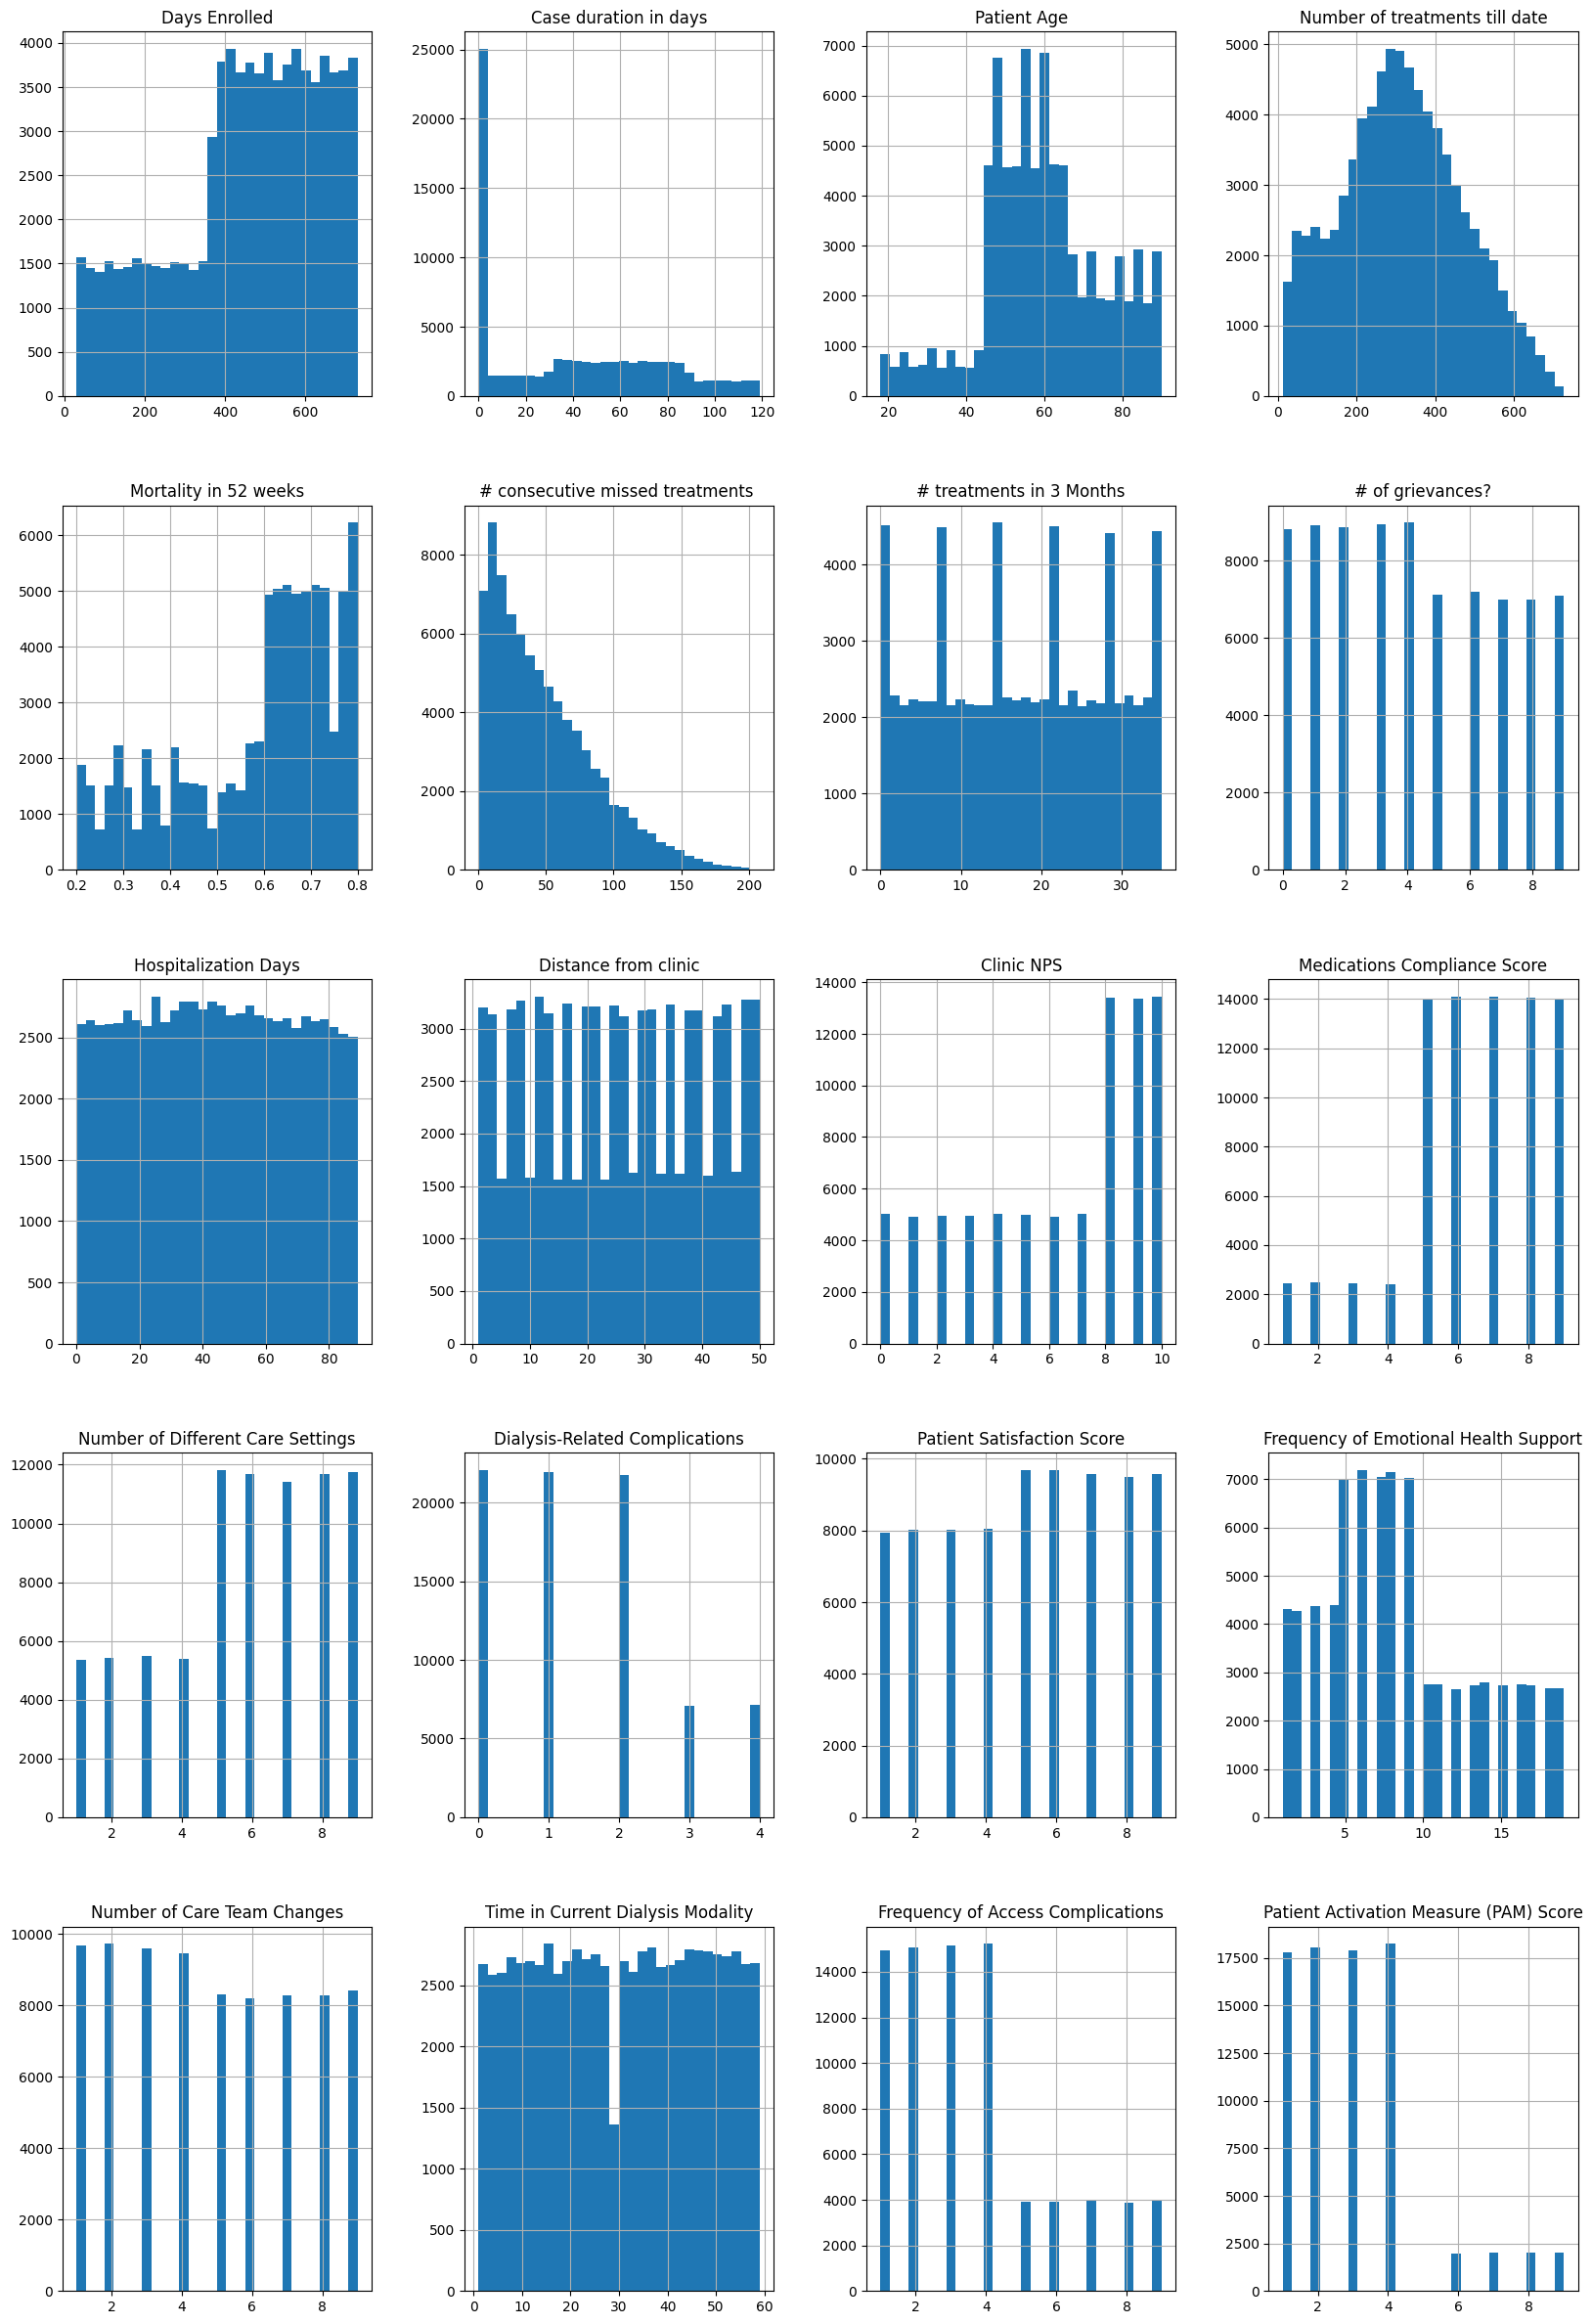

In [7]:
# Explore data distributions using histograms
train_data.hist(bins=30, figsize=(20, 30))
plt.show()

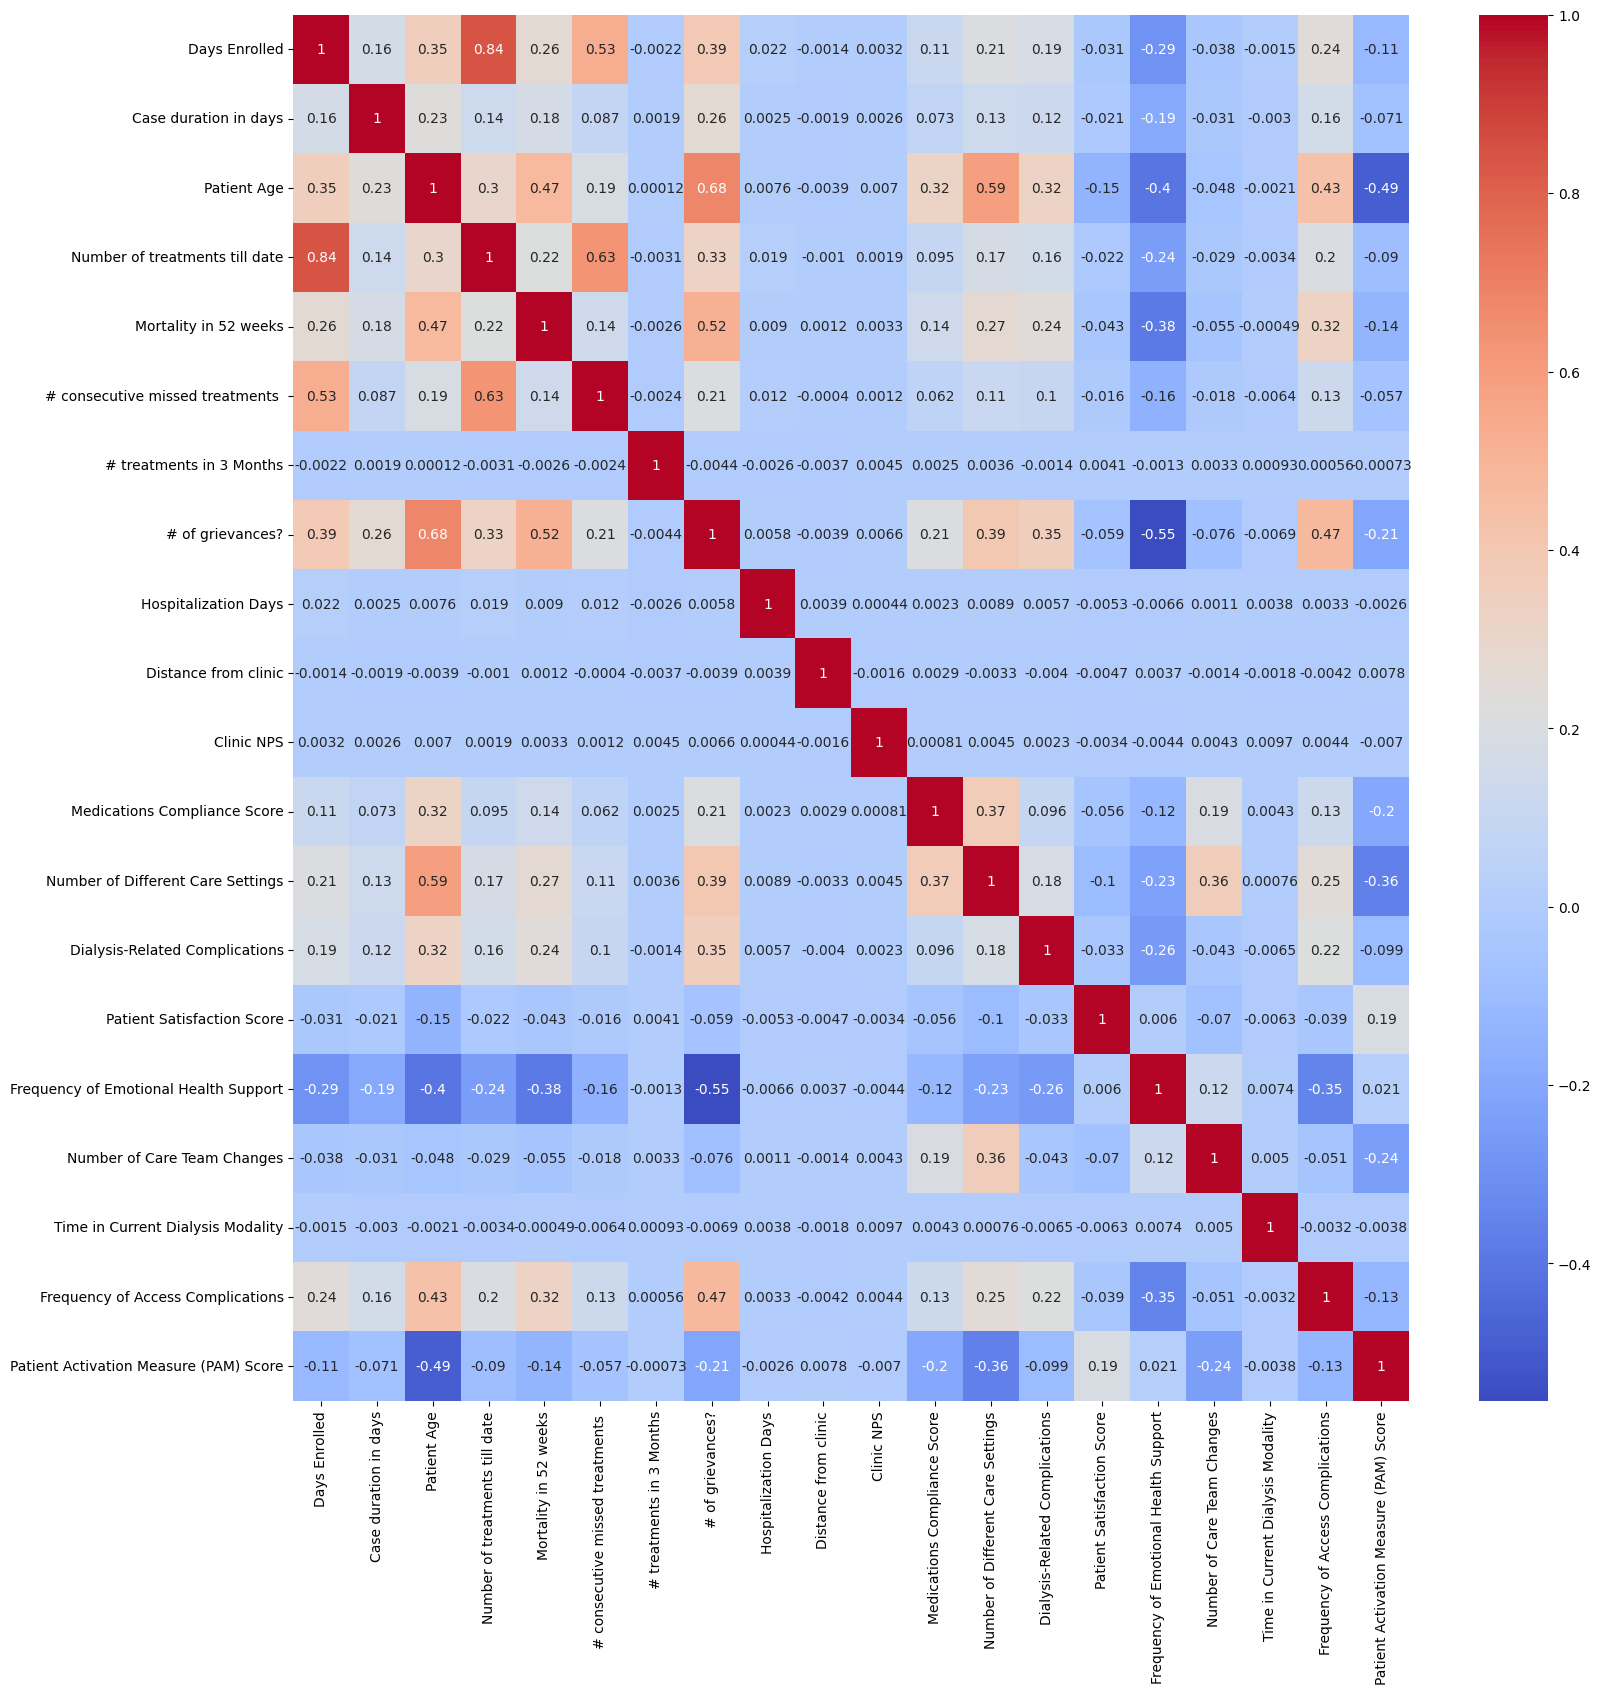

In [8]:
# Define the list of columns you want to analyze
columns_to_analyze = [
    'Days Enrolled', 'Case duration in days', 'Patient Age', 'Number of treatments till date',
    'Mortality in 52 weeks', '# consecutive missed treatments ', '# treatments in 3 Months',
    '# of grievances?', 'Hospitalization Days', 'Distance from clinic', 'Clinic NPS',
    'Medications Compliance Score', 'Number of Different Care Settings', 'Dialysis-Related Complications',
    'Patient Satisfaction Score', 'Frequency of Emotional Health Support', 'Number of Care Team Changes',
    'Time in Current Dialysis Modality', 'Frequency of Access Complications',
    'Patient Activation Measure (PAM) Score'
]

# Calculate the correlation matrix for the selected columns
correlation_matrix = train_data[columns_to_analyze].corr()

# Set up figure size
plt.figure(figsize=(18, 18))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

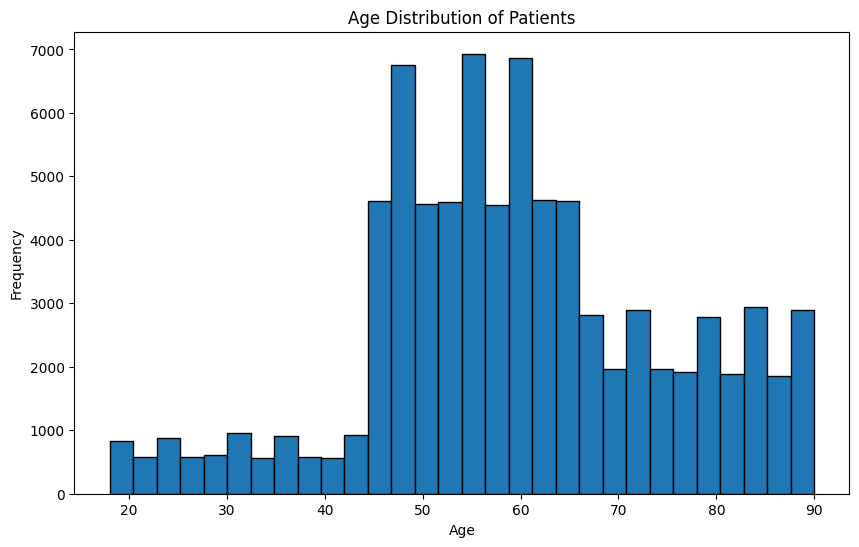

In [9]:
# Plotting configurations for readability
plt.figure(figsize=(10, 6))

# Plot 1: Age Distribution
plt.hist(train_data['Patient Age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

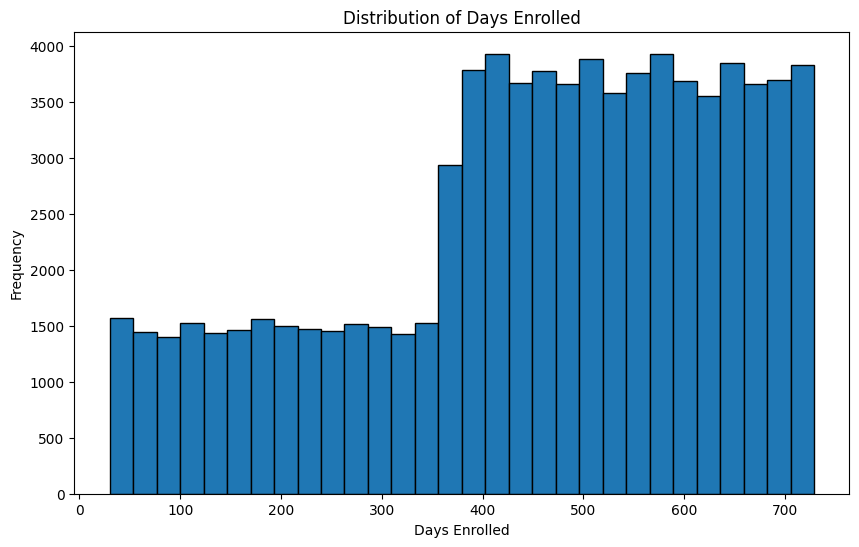

In [10]:
# Plot 2: Days Enrolled Distribution
plt.figure(figsize=(10, 6))
plt.hist(train_data['Days Enrolled'], bins=30, edgecolor='black')
plt.title('Distribution of Days Enrolled')
plt.xlabel('Days Enrolled')
plt.ylabel('Frequency')
plt.show()

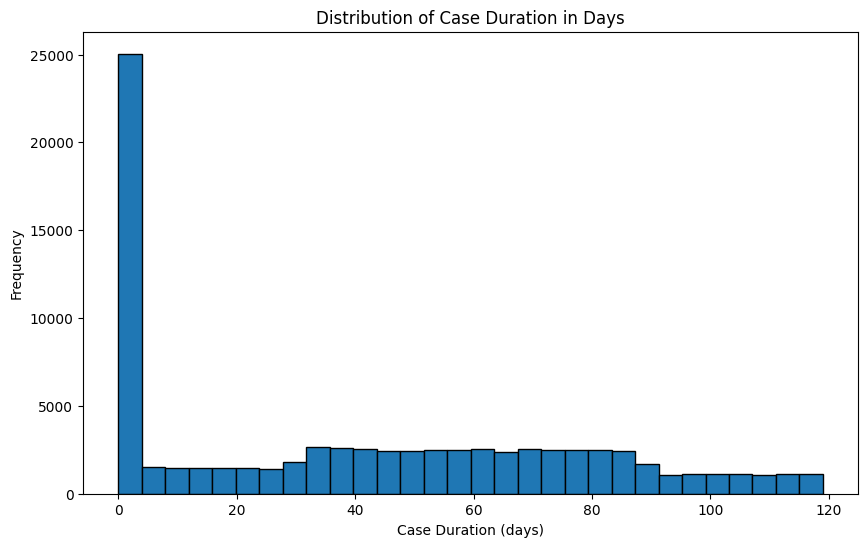

In [11]:
# Plot 3: Case Duration Distribution
plt.figure(figsize=(10, 6))
plt.hist(train_data['Case duration in days'], bins=30, edgecolor='black')
plt.title('Distribution of Case Duration in Days')
plt.xlabel('Case Duration (days)')
plt.ylabel('Frequency')
plt.show()

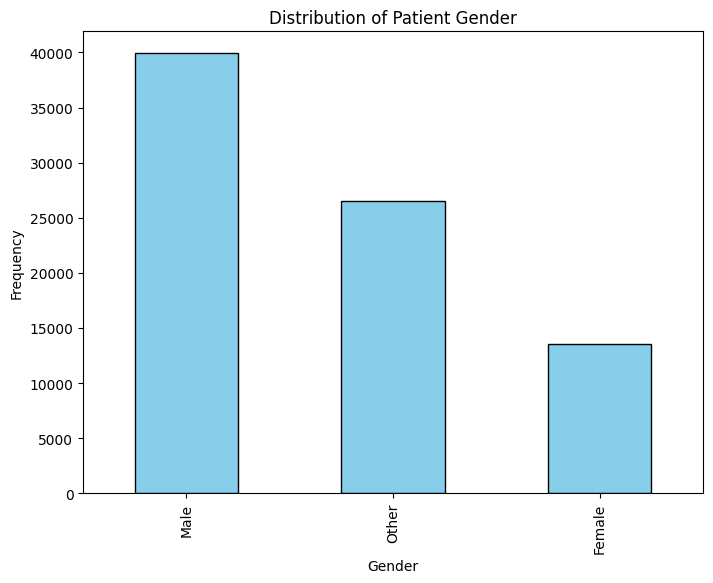

In [12]:
# Plot 4: Gender Distribution
plt.figure(figsize=(8, 6))
train_data['Patient Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

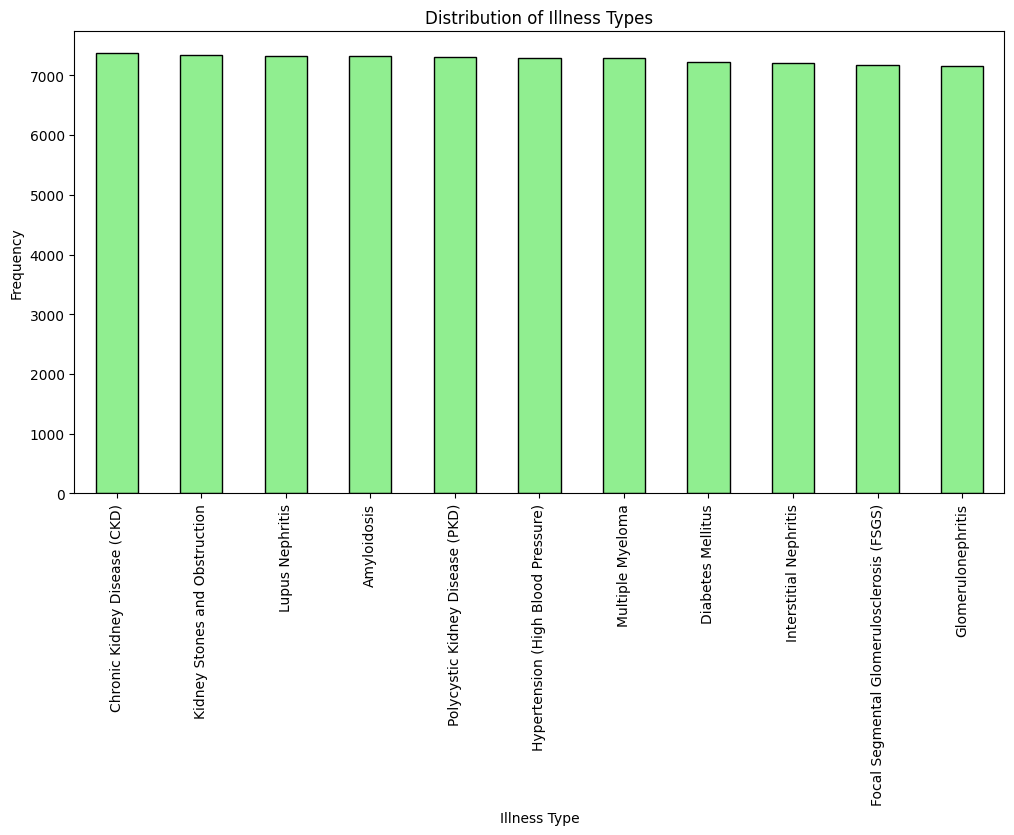

In [13]:
# Plot 5: Illness Type Distribution
plt.figure(figsize=(12, 6))
train_data['Illness type?'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Illness Types')
plt.xlabel('Illness Type')
plt.ylabel('Frequency')
plt.show()

## **Data Preparation**

### Retention Model ###

In [14]:
# Identify columns for encoding
one_hot_cols = ['Action Taken', 'Illness type?', 'Patient Gender', 'Preferred Language',
                'Patient Ethnic Background', 'Mode of transport', 'Health Ins. Type',
                'Comorbidities', 'Dialysis Shift Timing', 'Access Type',
                'Appointment Reminder Type']

label_encode_cols = ['Blood Pressure Fluctuations', 'Clinic Hygiene',
                     'Clinic Size', 'Care Team Relationship Score', 'Week Number']

In [15]:
# Drop unnecessary columns
columns_to_drop_retention = ['Date of enrollment', 'Patient ID', 'First Name', 'Last Name', 'Case Assignment Date',
                   'COC ID', 'Patient Address', 'Patient City', 'Patient State', 'Clinic Location','Reason for missing']
data_retention = train_data.drop(columns=columns_to_drop_retention)

# Separate the target column
target_retention = 'Retention'

# Apply One-Hot Encoding
data_retention = pd.get_dummies(data_retention, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
for col in label_encode_cols:
    encoder = LabelEncoder()
    data_retention[col] = encoder.fit_transform(data_retention[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = data_retention.select_dtypes(include=['int64', 'float64']).columns
data_retention[numerical_cols] = scaler.fit_transform(data_retention[numerical_cols])

In [16]:
data_retention.head()

,Week Number,Case Assigned,Days Enrolled,Case duration in days,At home?,Patient Age,Lives Alone?,Number of treatments till date,Mortality in 52 weeks,# consecutive missed treatments,...,Access Type_Central Venous Catheter,Access Type_Hemodialysis Catheter,Access Type_Jugular Catheter,Access Type_Non-Tunneled Central Venous Catheter,Access Type_Peritoneal Dialysis Catheter,Access Type_Subclavian Catheter,Access Type_Subcutaneous Venous Port,Access Type_Tunneled Central Venous Catheter,Appointment Reminder Type_Email,Appointment Reminder Type_SMS
0,0.185994,True,-0.404798,1.584594,False,0.097252,False,0.362740,0.548481,0.248921,...,False,False,False,False,False,False,False,False,True,False
1,0.185994,True,0.860680,1.722039,False,1.004534,True,1.038236,0.727229,1.061503,...,False,False,False,True,False,False,False,False,False,False
2,-1.750304,True,0.338334,0.485035,False,1.198952,False,0.935303,0.190986,0.248921,...,False,False,False,False,False,False,False,False,False,False
3,-0.782155,False,1.269941,-1.109326,True,-0.615612,False,0.723004,-2.013568,-0.930634,...,False,False,False,False,False,False,False,False,False,True
4,1.154142,False,0.532194,-1.109326,False,-0.615612,False,-0.306322,-1.060248,-1.087908,...,False,False,False,False,False,False,False,False,True,False


In [17]:
data_retention.columns

Index(['Week Number', 'Case Assigned', 'Days Enrolled',
       'Case duration in days', 'At home?', 'Patient Age', 'Lives Alone?',
       'Number of treatments till date', 'Mortality in 52 weeks',
       '# consecutive missed treatments ', '# treatments in 3 Months',
       '# of grievances?', 'Hospitalization Days', 'Hospitalization Status',
       'Distance from clinic', 'Clinic NPS', 'Support Programs Participation',
       'Medications Compliance Score', 'Financial Challenges',
       'Number of Different Care Settings', 'Physical Activity and Well-being',
       'Patient Engagement via PatientHub', 'Care Team Relationship Score',
       'Dialysis-Related Complications', 'Clinic Size', 'Clinic Hygiene',
       'Patient Satisfaction Score', 'Social Support Availability',
       'Frequency of Emotional Health Support', 'Number of Care Team Changes',
       'Nutritional Counseling Attendance',
       'Time in Current Dialysis Modality',
       'Frequency of Access Complications',
    

In [18]:
data_retention['Retention']

,Retention
0,True
1,True
2,False
3,True
4,False
...,...
79995,True
79996,True
79997,True
79998,False


### Reason Model ###

In [19]:
# Drop unnecessary columns
columns_to_drop_reason = ['Date of enrollment', 'Patient ID', 'First Name', 'Last Name', 'Case Assignment Date',
                   'COC ID', 'Patient Address', 'Patient City', 'Patient State', 'Clinic Location', 'Retention']
data_multi = train_data.drop(columns=columns_to_drop_reason)

# Separate the target column
target_reason = 'Reason for missing'

# Apply One-Hot Encoding
data_multi = pd.get_dummies(data_multi, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
for col in label_encode_cols:
    encoder = LabelEncoder()
    data_multi[col] = encoder.fit_transform(data_multi[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = data_multi.select_dtypes(include=['int64', 'float64']).columns
data_multi[numerical_cols] = scaler.fit_transform(data_multi[numerical_cols])

In [20]:
data_multi.head()

,Week Number,Case Assigned,Days Enrolled,Case duration in days,At home?,Patient Age,Lives Alone?,Number of treatments till date,Mortality in 52 weeks,# consecutive missed treatments,...,Access Type_Central Venous Catheter,Access Type_Hemodialysis Catheter,Access Type_Jugular Catheter,Access Type_Non-Tunneled Central Venous Catheter,Access Type_Peritoneal Dialysis Catheter,Access Type_Subclavian Catheter,Access Type_Subcutaneous Venous Port,Access Type_Tunneled Central Venous Catheter,Appointment Reminder Type_Email,Appointment Reminder Type_SMS
0,0.185994,True,-0.404798,1.584594,False,0.097252,False,0.362740,0.548481,0.248921,...,False,False,False,False,False,False,False,False,True,False
1,0.185994,True,0.860680,1.722039,False,1.004534,True,1.038236,0.727229,1.061503,...,False,False,False,True,False,False,False,False,False,False
2,-1.750304,True,0.338334,0.485035,False,1.198952,False,0.935303,0.190986,0.248921,...,False,False,False,False,False,False,False,False,False,False
3,-0.782155,False,1.269941,-1.109326,True,-0.615612,False,0.723004,-2.013568,-0.930634,...,False,False,False,False,False,False,False,False,False,True
4,1.154142,False,0.532194,-1.109326,False,-0.615612,False,-0.306322,-1.060248,-1.087908,...,False,False,False,False,False,False,False,False,True,False


## **Modeling** ##

### Retention Model ###

In [21]:
# Prepare data for retention model
X_retention = data_retention.drop(columns=[target_retention])
y_retention = data_retention[target_retention]

# Split into train and test sets
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(
    X_retention, y_retention, test_size=0.2, random_state=42
)

In [22]:
# Train a binary classifier
binary_classifier = RandomForestClassifier(random_state=42)
binary_classifier.fit(X_train_ret, y_train_ret)

# Evaluate model
y_pred_ret = binary_classifier.predict(X_test_ret)
accuracy_ret = accuracy_score(y_test_ret, y_pred_ret)
conf_matrix_ret = confusion_matrix(y_test_ret, y_pred_ret)

print("Binary Classifier (Retention) Accuracy:", accuracy_ret)
print("Binary Classifier (Retention) Confusion Matrix:\n", conf_matrix_ret)

Binary Classifier (Retention) Accuracy: 0.4995
Binary Classifier (Retention) Confusion Matrix:
 [[4322 3739]
 [4269 3670]]


### Reason Model ###

In [23]:
# Prepare data for multi-class classification
X_reason = data_multi.drop(columns=[target_reason])
y_reason = data_multi[target_reason]

# Split into train and test sets
X_train_reason, X_test_reason, y_train_reason, y_test_reason = train_test_split(
    X_reason, y_reason, test_size=0.2, random_state=42
)

In [24]:
# Train a multi-class classifier
multi_classifier = RandomForestClassifier(random_state=42)
multi_classifier.fit(X_train_reason, y_train_reason)

# Evaluate model
y_pred_reason = multi_classifier.predict(X_test_reason)
accuracy_reason = accuracy_score(y_test_reason, y_pred_reason)
conf_matrix_reason = confusion_matrix(y_test_reason, y_pred_reason)

print("Multi-Class Classifier (Reason for Missing) Accuracy:", accuracy_reason)
print("Multi-Class Classifier (Reason for Missing) Confusion Matrix:\n", conf_matrix_reason)

Multi-Class Classifier (Reason for Missing) Accuracy: 0.08625
Multi-Class Classifier (Reason for Missing) Confusion Matrix:
 [[139 130 137 133 159 135 100 122  94 128 103]
 [176 121 135 129 179 127 131 112 125 141 100]
 [173 132 159 131 149 133 130 108 119 116 113]
 [153 148 151 145 162 157  92 139 123  99 118]
 [186 157 143 144 132 148 110 119 127 120 111]
 [160 165 145 125 181 117 100 119 119 113 115]
 [151 141 144 134 133 151 106 117 117 122 105]
 [159 165 131 125 158 147  92 115 135 115 115]
 [155 164 171 114 154 133 119 104 120 107 122]
 [154 157 154 122 164 133  92 112 120 117  93]
 [163 168 147 117 160 132 130 110 124 119 109]]


## **Testing** ##

### Retention Model ###

In [25]:
columns_to_drop = ['Date of enrollment', 'Patient ID', 'First Name', 'Last Name', 'Case Assignment Date',
                   'COC ID', 'Patient Address', 'Patient City', 'Patient State', 'Clinic Location']

In [26]:
# Drop unnecessary columns
test_data_retention = final_test_data.drop(columns=columns_to_drop)

# Apply One-Hot Encoding (exclude the 'Retention' column if it exists in the test data)
test_data_retention = pd.get_dummies(test_data_retention, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
for col in label_encode_cols:
    encoder = LabelEncoder()
    test_data_retention[col] = encoder.fit_transform(test_data_retention[col])

# Scale numerical features
test_data_retention[numerical_cols] = scaler.transform(test_data_retention[numerical_cols])

# Align the test dataset with the training dataset features
# test_data_retention_aligned = test_data_retention.reindex(columns=X_retention.columns, fill_value=0)

In [27]:
# Predict probabilities for retention
retention_probs = binary_classifier.predict_proba(test_data_retention)[:, 1]

# Classify as True/False based on threshold
retention_preds = retention_probs > 0.5

# Add predictions to the test data
test_data_retention['Retention Probability'] = retention_probs
test_data_retention['Retention'] = retention_preds

### Reason Model ###

In [28]:
# Drop unnecessary columns
test_data_reason = final_test_data.drop(columns=columns_to_drop)

# Apply One-Hot Encoding (exclude the 'Reason for Missing' column if it exists in the test data)
test_data_reason = pd.get_dummies(test_data_reason, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
for col in label_encode_cols:
    encoder = LabelEncoder()
    test_data_reason[col] = encoder.fit_transform(test_data_reason[col])

# Scale numerical features
test_data_reason[numerical_cols] = scaler.transform(test_data_reason[numerical_cols])

# Align the test dataset with the training dataset features
# test_data_reason_aligned = test_data_reason.reindex(columns=X_reason.columns, fill_value=0)

In [29]:
# Predict reasons for missing
reason_preds = multi_classifier.predict(test_data_reason)

# Add predictions to the test data
test_data_reason['Predicted Reason for Missing'] = reason_preds

In [30]:
# Test accuracy for binary classifier
test_accuracy_ret = binary_classifier.score(X_test_ret, y_test_ret)

# Test accuracy for multi-class classifier
test_accuracy_reason = multi_classifier.score(X_test_reason, y_test_reason)

# Print test accuracies
print(f"Retention Model Test Accuracy: {test_accuracy_ret:.2f}")
print(f"Reason for Missing Model Test Accuracy: {test_accuracy_reason:.2f}")

Retention Model Test Accuracy: 0.50
Reason for Missing Model Test Accuracy: 0.09


In [31]:
print("Retention Predictions:")
print(test_data_retention[['Retention Probability', 'Retention']].head())

Retention Predictions:
   Retention Probability  Retention
0                   0.40      False
1                   0.47      False
2                   0.49      False
3                   0.53       True
4                   0.47      False


In [32]:
print("Reason for Missing Predictions:")
print(test_data_reason[['Predicted Reason for Missing']].head())

Reason for Missing Predictions:
   Predicted Reason for Missing
0             Clinic is too far
1          I have other reasons
2  I have Work Responsibilities
3  I have Work Responsibilities
4   I have Financial Challenges
